# <font color='#B68D40'><h2>Data Downloading from Kaggle</font>
After downloading the datasets from Kaggle, the code uses a function to unzip the datasets for further use in the model.
<br>
steps to download kaggle.json

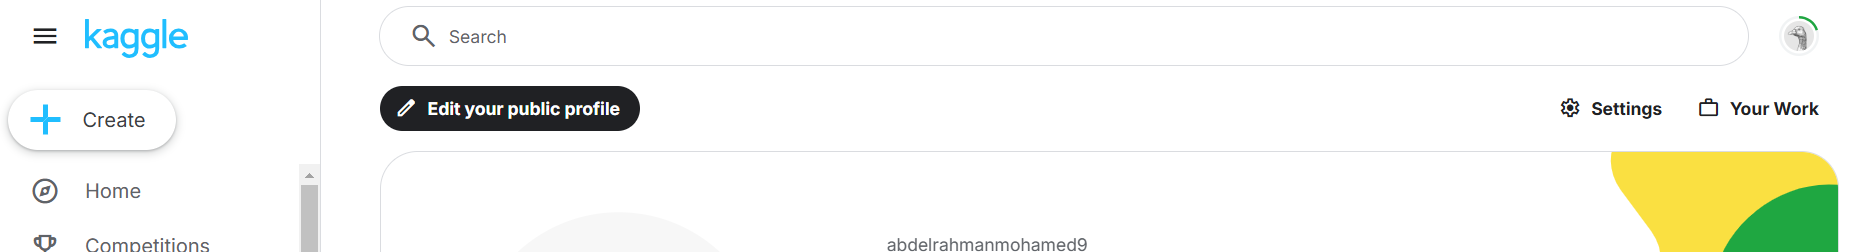

In [ ]:
!pip install kaggle==1.5.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73026 sha256=05ae175528b0eb1de2a4774b70c7bed71ecd163a3892ffb001a4c04d79338212
  Stored in directory: /root/.cache/pip/wheels/2e/27/39/f44e52756a6407b444143f233abe9fda0e18a23e8b20e0cd1c
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.2
    Uninstalling kaggle-1.7.4.2:
      Successfully uninstalled kaggle-1.7.4.2


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fatmaalzhraahmed","key":"3eed64e21ca24f20e09f62453619f9d4"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paultimothymooney/kermany2018

100% 10.8G/10.8G [01:03<00:00, 284MB/s]
100% 10.8G/10.8G [01:03<00:00, 183MB/s]


In [ ]:
!unzip kermany2018.zip -d kermany2018

Streaming output truncated to the last 5000 lines.
  inflating: kermany2018/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8050636-2.jpeg  
  inflating: kermany2018/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-1.jpeg  
  inflating: kermany2018/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-2.jpeg  
  inflating: kermany2018/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-3.jpeg  
  inflating: kermany2018/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-1.jpeg  
  inflating: kermany2018/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-2.jpeg  
  inflating: kermany2018/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-3.jpeg  
  inflating: kermany2018/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-1.jpeg  
  inflating: kermany2018/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-2.jpeg  
  inflating: kermany2018/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-3.jpeg  
  inflating: kermany2018/oct2017/__MACOSX/OCT2017

# <b><font color='#B68D40'><h1>Import Required Libraries</font></b>

In [ ]:
# Import necessary libraries for visualization, image processing, and file handling
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
import seaborn as sns
import cv2
from glob import glob
from tqdm import tqdm
import random
import shutil

In [ ]:
train_dir = '/content/kermany2018/OCT2017 /train'
print("Train Directory --> ", os.listdir(train_dir))

validation_dir = '/content/kermany2018/OCT2017 /val'
print("Validation Directory --> ", os.listdir(validation_dir))

test_dir = '/content/kermany2018/OCT2017 /test'
print("Test Directory --> ", os.listdir(test_dir))


Train Directory -->  ['DRUSEN', 'NORMAL', 'CNV', 'DME']
Validation Directory -->  ['DRUSEN', 'NORMAL', 'CNV', 'DME']
Test Directory -->  ['DRUSEN', 'NORMAL', 'CNV', 'DME']


# <b><font color='#B68D40'><h1>Count Images Per Class</font></b>

In [ ]:
output_dir = '/content/kermany2018/OCT2017 /train'

class_names = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

for class_name in class_names:
    class_dir = os.path.join(output_dir, class_name)

    if os.path.exists(class_dir):
        num_images = len(os.listdir(class_dir))
        print(f"{class_name}: {num_images} images")
    else:
        print(f"Directory not found: {class_dir}")


CNV: 37205 images
DME: 11348 images
DRUSEN: 8616 images
NORMAL: 26315 images


# <b><font color='#B68D40'><h1>Display One Image from Each Categor</font></b>

Categories: ['DRUSEN', 'NORMAL', 'CNV', 'DME']


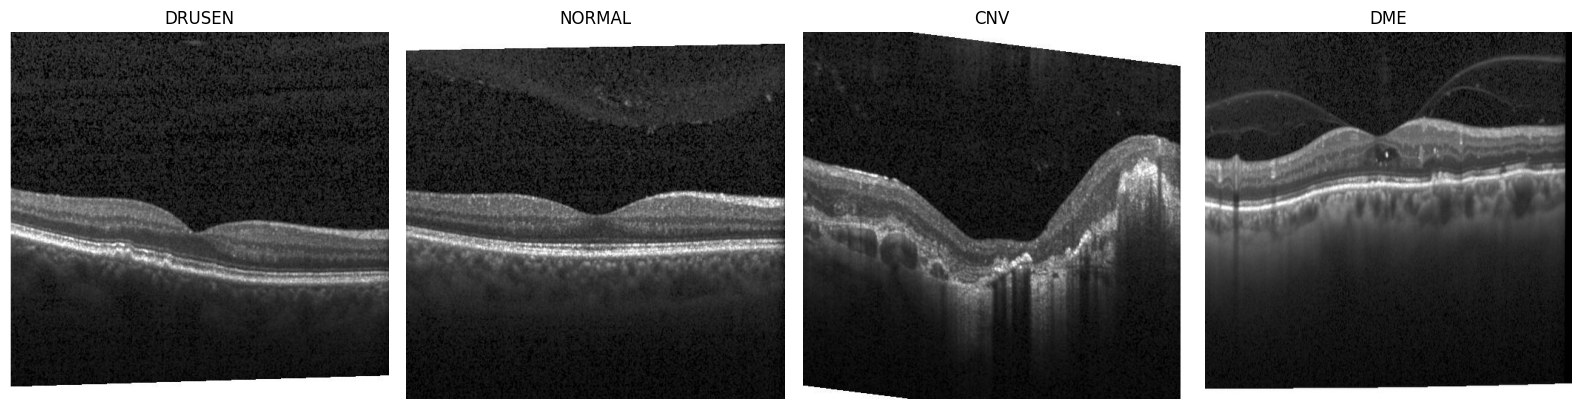

In [ ]:
from PIL import Image

categories = os.listdir(train_dir)
print("Categories:", categories)

num_categories = len(categories)

plt.figure(figsize=(num_categories * 4, 4))

for idx, category in enumerate(categories):
    category_path = os.path.join(train_dir, category)
    image_files = os.listdir(category_path)

    if image_files:
        img_path = os.path.join(category_path, image_files[0])
        img = Image.open(img_path)

        plt.subplot(1, num_categories, idx + 1)
        plt.imshow(img, cmap='gray')
        plt.title(category)
        plt.axis('off')

plt.tight_layout()
plt.show()


# <b><font color='#B68D40'><h1>Visualize Image Count per Class</font></b>

---



<ipython-input-10-97047b26eb57>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=df, palette='viridis')


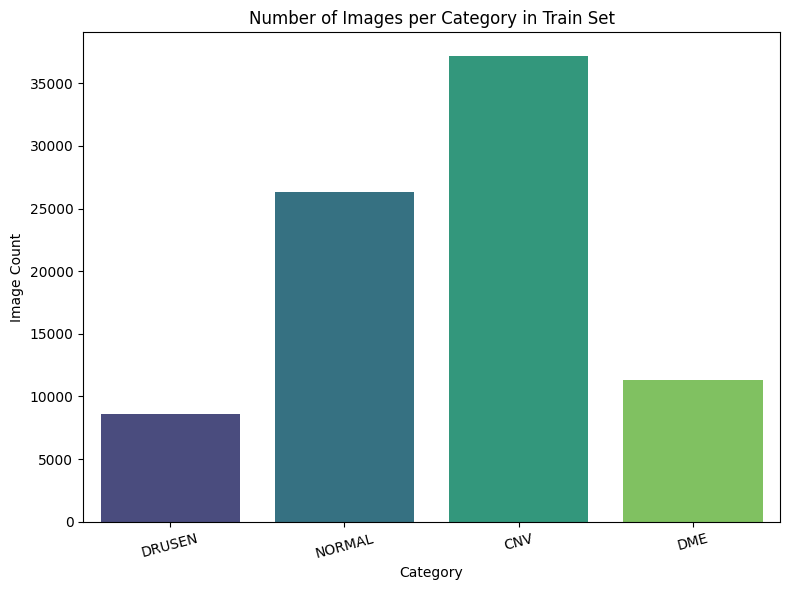

In [ ]:
import seaborn as sns
category_counts = {}
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    count = len(os.listdir(category_path))
    category_counts[category] = count

df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Count'])

plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=df, palette='viridis')

plt.title('Number of Images per Category in Train Set')
plt.xlabel('Category')
plt.ylabel('Image Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [ ]:
# Define the original dataset directories
train_dir = "/content/kermany2018/OCT2017 /train"
val_dir = "/content/kermany2018/OCT2017 /val"
test_dir = "/content/kermany2018/OCT2017 /test"

# Use working directory
combined_dir = "./combined_dataset"
os.makedirs(combined_dir, exist_ok=True)

# List of categories
categories = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

# Function to copy images from all splits into one combined folder
def combine_images(split_dirs, dest_root, categories):
    for split_dir in split_dirs:
        split_name = os.path.basename(split_dir)
        for category in categories:
            src_folder = os.path.join(split_dir, category)
            dst_folder = os.path.join(dest_root, category)
            os.makedirs(dst_folder, exist_ok=True)
            for img_path in glob(os.path.join(src_folder, "*.jpeg")):
                img_name = os.path.basename(img_path)
                dst_path = os.path.join(dst_folder, f"{split_name}_{img_name}")
                shutil.copy(img_path, dst_path)

combine_images([train_dir, val_dir, test_dir], combined_dir, categories)


# <b><font color='#B68D40'><h1>Preprocessing & ROI Detection (Basic Pipeline)</font></b>
<font color='#D6AD60'>Defines a function to process images by resizing, applying CLAHE, thresholding, and drawing bounding boxes around the region of interest (ROI) using contours.</font>

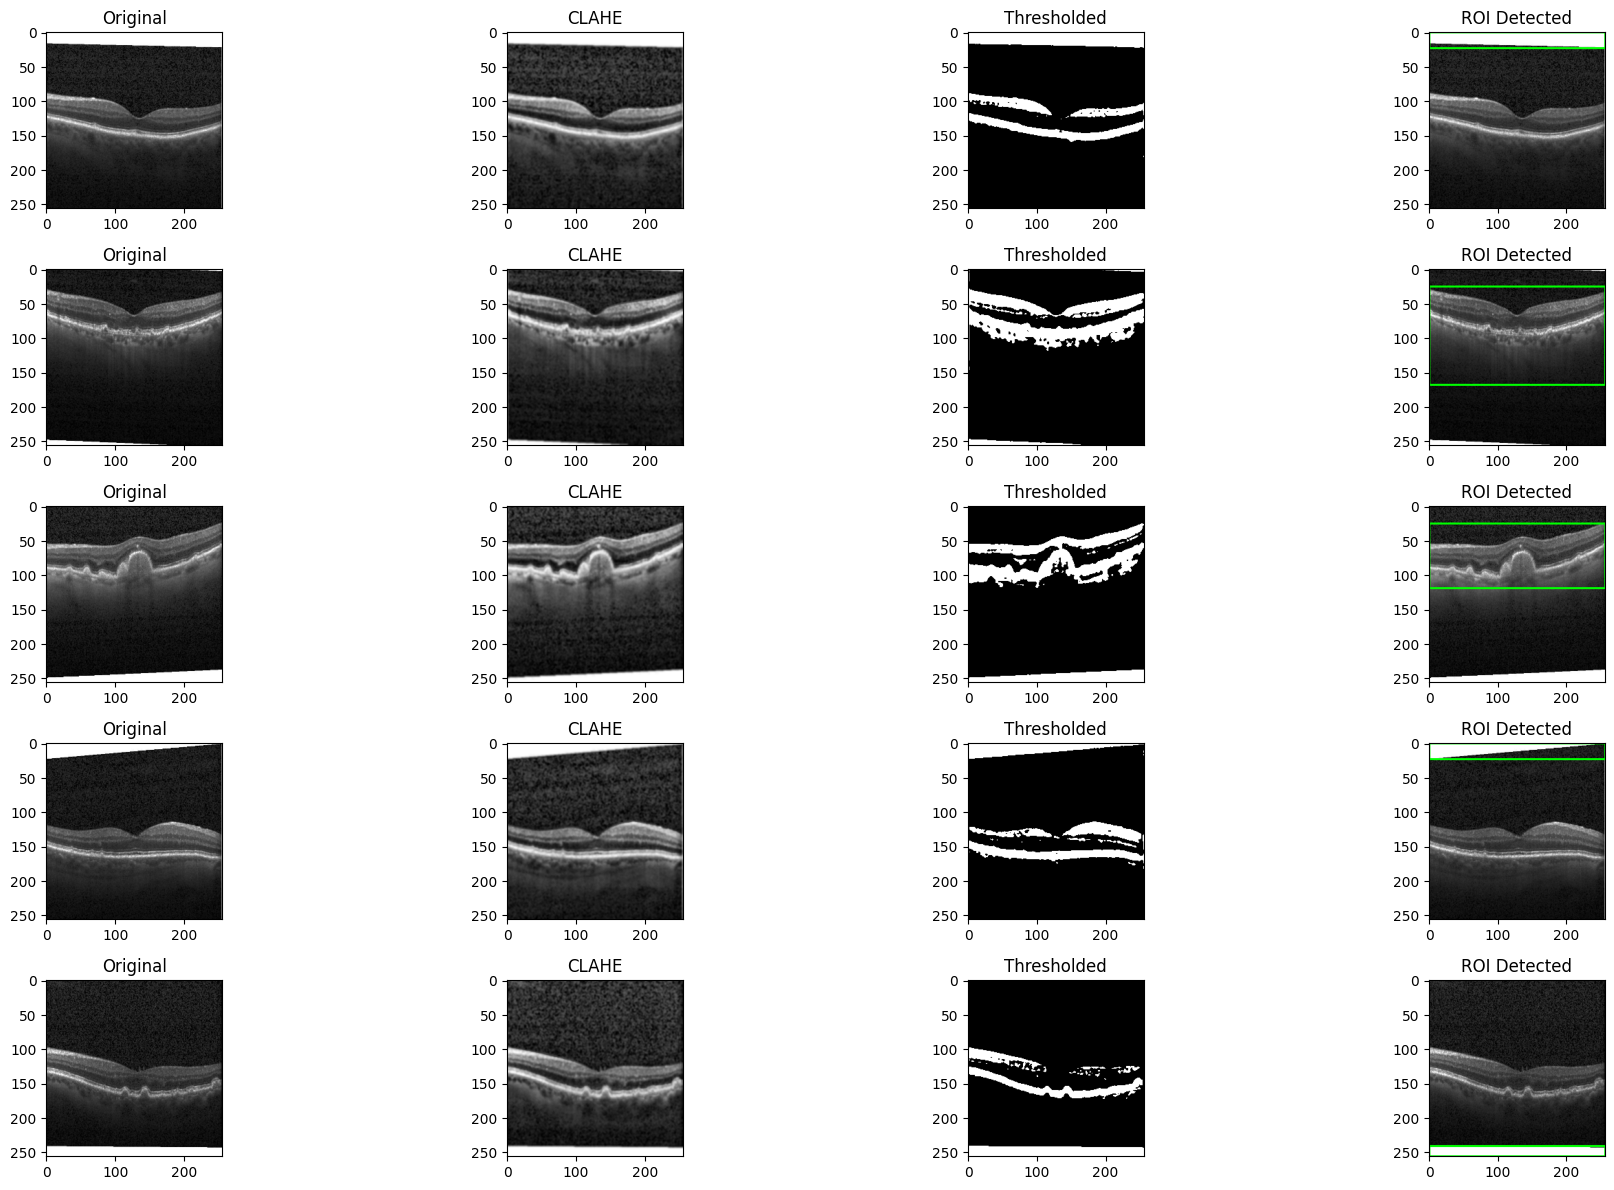

In [ ]:
all_image_paths = glob('/content/combined_dataset/*/*.jpeg')

def process_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (256, 256))
    img_blur = cv2.GaussianBlur(img_resized, (5, 5), 0)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_clahe = clahe.apply(img_blur)
    _, img_thresh = cv2.threshold(img_clahe, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_contour = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2BGR)

    if contours:
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(img_contour, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return img_resized, img_clahe, img_thresh, img_contour

sample_imgs = all_image_paths[:5]

plt.figure(figsize=(20, 12))
for idx, path in enumerate(sample_imgs):
    img_resized, img_clahe, img_thresh, img_contour = process_image(path)

    plt.subplot(len(sample_imgs), 4, idx * 4 + 1)
    plt.imshow(img_resized, cmap='gray')
    plt.title('Original')

    plt.subplot(len(sample_imgs), 4, idx * 4 + 2)
    plt.imshow(img_clahe, cmap='gray')
    plt.title('CLAHE')

    plt.subplot(len(sample_imgs), 4, idx * 4 + 3)
    plt.imshow(img_thresh, cmap='gray')
    plt.title('Thresholded')

    plt.subplot(len(sample_imgs), 4, idx * 4 + 4)
    plt.imshow(img_contour)
    plt.title('ROI Detected')

plt.tight_layout()
plt.show()


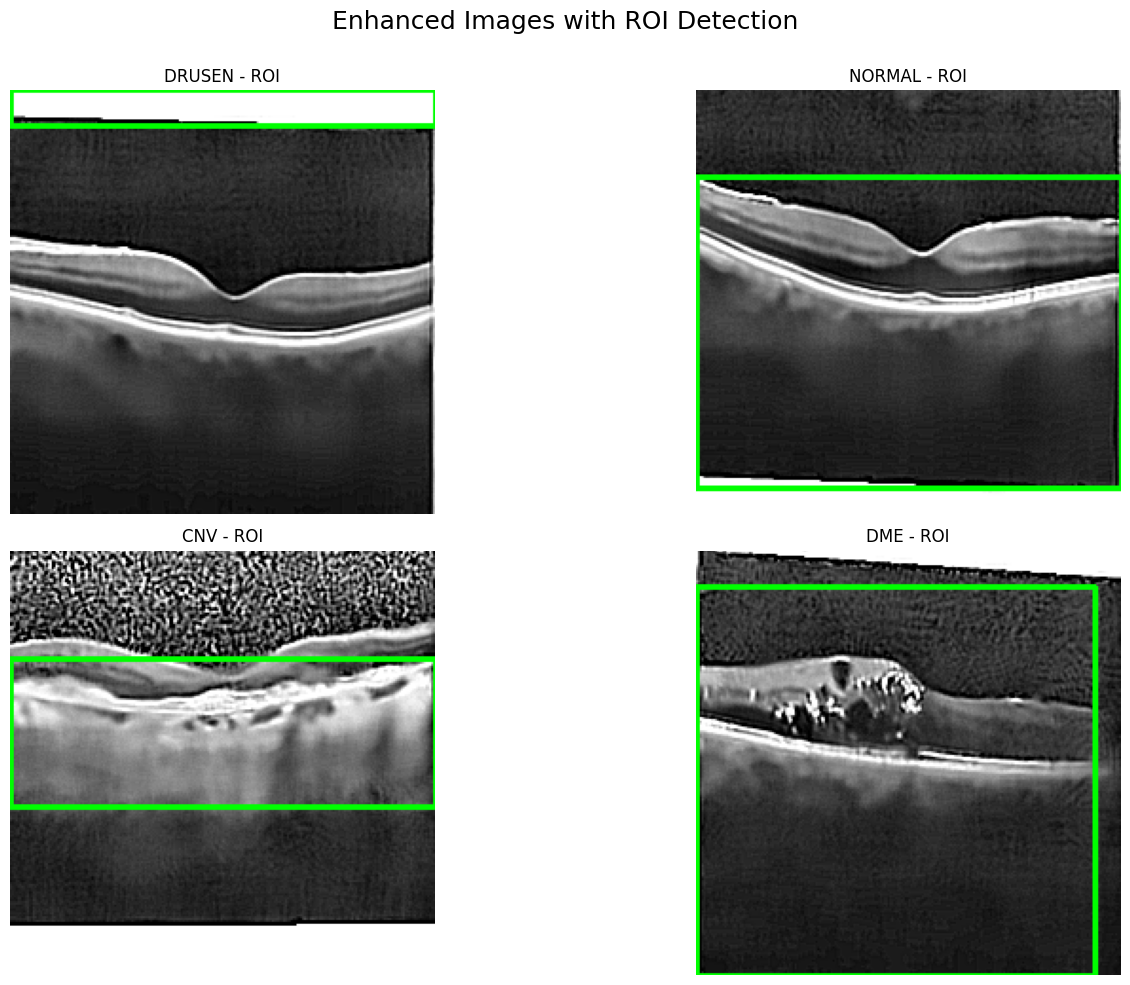

In [ ]:
balanced_dir = "/content/combined_dataset"

categories = [cat for cat in os.listdir(balanced_dir) if os.path.isdir(os.path.join(balanced_dir, cat))]
num_categories_to_show = min(4, len(categories))

plt.figure(figsize=(16, 10))

for i, category in enumerate(categories[:num_categories_to_show]):
    category_path = os.path.join(balanced_dir, category)
    image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print(f"No images found in {category_path}. Skipping.")
        continue

    img_path = os.path.join(category_path, image_files[0])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Failed to load image: {img_path}. Skipping.")
        continue

    # Step 1: Resize
    img_resized = cv2.resize(img, (224, 224))

    # Step 2: Denoise
    img_denoised = cv2.fastNlMeansDenoising(img_resized, h=15)

    # Step 3: CLAHE
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(6, 6))
    img_clahe = clahe.apply(img_denoised)

    # Step 4: Blur + Sharpen
    img_blur = cv2.GaussianBlur(img_clahe, (3, 3), 0)
    sharpen_kernel = np.array([[-1, -1, -1],
                               [-1,  9, -1],
                               [-1, -1, -1]])
    img_sharpened = cv2.filter2D(img_blur, -1, sharpen_kernel)

    # Step 5: ROI Detection using Threshold + Contours
    _, img_thresh = cv2.threshold(img_sharpened, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    img_roi = cv2.cvtColor(img_sharpened, cv2.COLOR_GRAY2BGR)
    if contours:
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(img_roi, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Step 6: Plot with ROI box
    plt.subplot(2, 2, i + 1)
    plt.imshow(img_roi)
    plt.title(f"{category} - ROI")
    plt.axis('off')

plt.suptitle("Enhanced Images with ROI Detection", fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


# <b><font color='#B68D40'><h1>Enhanced Preprocessing & ROI Visualization</font></b>
<font color='#D6AD60'>Demonstrates an enhanced image preprocessing pipeline that includes denoising, sharpening, and ROI detection. Displays results for 4 categories.</font>

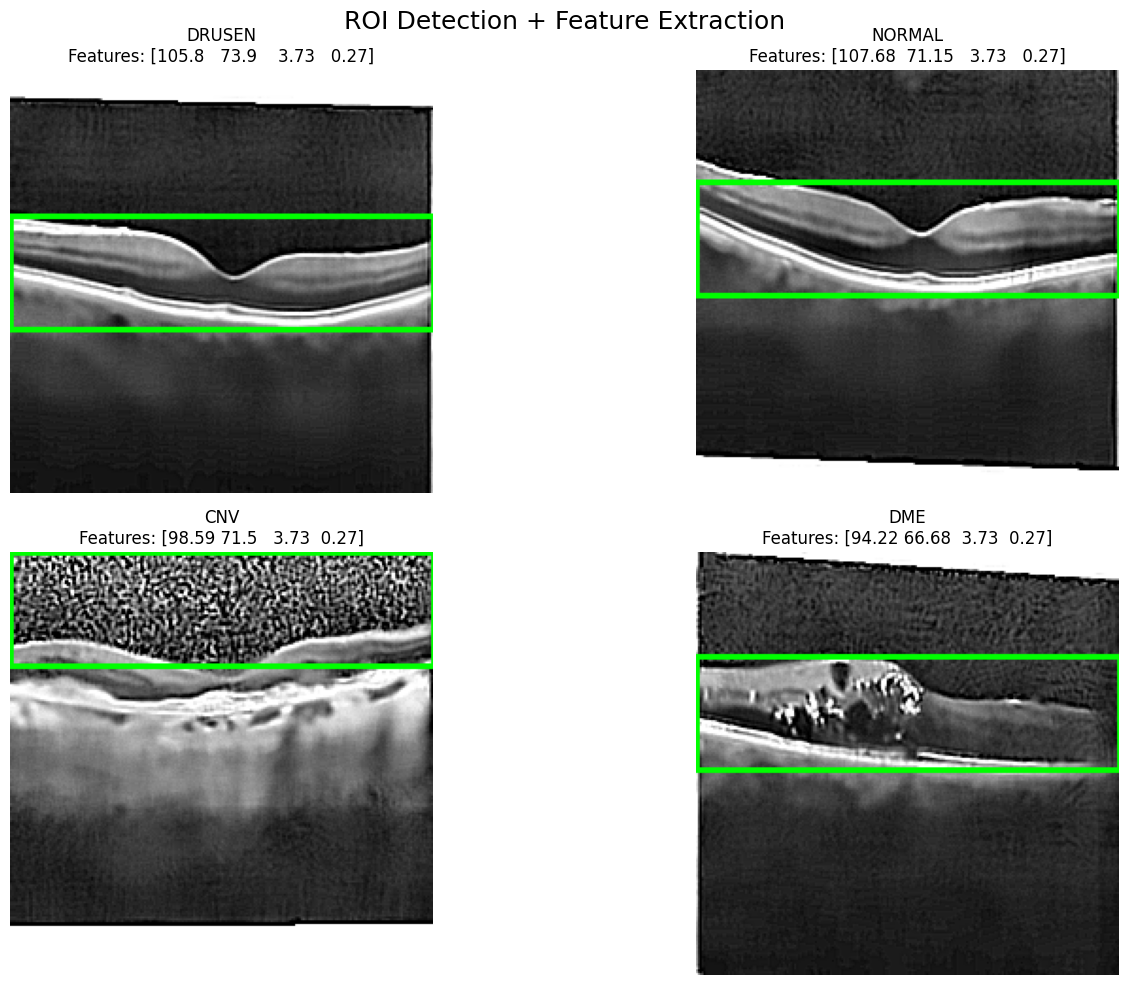

In [ ]:
def preprocess_image(img):
    img = cv2.resize(img, (224, 224))
    img = cv2.fastNlMeansDenoising(img, h=15)

    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(6, 6))
    img = clahe.apply(img)

    blur = cv2.GaussianBlur(img, (3, 3), 0)
    sharpen_kernel = np.array([[-1, -1, -1],
                               [-1,  9, -1],
                               [-1, -1, -1]])
    img = cv2.filter2D(blur, -1, sharpen_kernel)

    return img

def detect_roi_by_edge_density(img_gray):
    sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    row_sum = np.sum(magnitude, axis=1)

    window_height = 60
    max_density = 0
    best_top = 0
    for top in range(0, len(row_sum) - window_height):
        density = np.sum(row_sum[top:top + window_height])
        if density > max_density:
            max_density = density
            best_top = top

    best_bottom = best_top + window_height
    roi_box = (0, best_top, img_gray.shape[1], window_height)
    return roi_box

def extract_features(img, roi_box):
    x, y, w, h = roi_box
    roi = img[y:y+h, x:x+w]

    mean_val = np.mean(roi)
    std_val = np.std(roi)
    aspect_ratio = w / h
    area_ratio = (w * h) / (img.shape[0] * img.shape[1])

    return [mean_val, std_val, aspect_ratio, area_ratio]

# ----------- Path to dataset ----------- #
balanced_dir = "/content/combined_dataset"
categories = [cat for cat in os.listdir(balanced_dir) if os.path.isdir(os.path.join(balanced_dir, cat))]
num_categories_to_show = min(4, len(categories))

plt.figure(figsize=(16, 10))

for i, category in enumerate(categories[:num_categories_to_show]):
    category_path = os.path.join(balanced_dir, category)
    image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        continue

    img_path = os.path.join(category_path, image_files[0])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    # Step 1: Preprocess
    img_preprocessed = preprocess_image(img)

    # Step 2: ROI Detection
    roi_box = detect_roi_by_edge_density(img_preprocessed)

    # Step 3: Feature Extraction
    features = extract_features(img_preprocessed, roi_box)

    # Draw ROI
    img_color = cv2.cvtColor(img_preprocessed, cv2.COLOR_GRAY2BGR)
    x, y, w, h = roi_box
    cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Show
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    plt.title(f"{category}\nFeatures: {np.round(features, 2)}")
    plt.axis('off')

plt.suptitle("ROI Detection + Feature Extraction", fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


In [ ]:
import os
import random
import shutil
train_dir="/content/combined_dataset"
balanced_dir = '/content/combined_balanced'
os.makedirs(balanced_dir, exist_ok=True)

min_count = min([len(os.listdir(os.path.join(train_dir, cat))) for cat in os.listdir(train_dir)])
print("Balancing to:", min_count, "images per category")

for category in os.listdir(train_dir):
    src_path = os.path.join(train_dir, category)
    dst_path = os.path.join(balanced_dir, category)
    os.makedirs(dst_path, exist_ok=True)

    images = os.listdir(src_path)
    sampled_images = random.sample(images, min_count)

    for img_name in sampled_images:
        shutil.copy(os.path.join(src_path, img_name), os.path.join(dst_path, img_name))


Balancing to: 8866 images per category


# <b><font color='#B68D40'><h1>Preprocessing Function</font></b>
<font color='#D6AD60'>This function preprocesses grayscale OCT images by:</font>

<font color='#D6AD60'>Resizing to 224x224 pixels.

<font color='#D6AD60'>Denoising using Non-local Means Denoising.

<font color='#D6AD60'>Enhancing contrast using CLAHE.

<font color='#D6AD60'>Applying a Gaussian Blur to smooth the image.

<font color='#D6AD60'>Applying a sharpening kernel to emphasize edges.

In [ ]:
def preprocess_image(img):
    img = cv2.resize(img, (224, 224))
    img = cv2.fastNlMeansDenoising(img, h=15)

    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(6, 6))
    img = clahe.apply(img)

    blur = cv2.GaussianBlur(img, (3, 3), 0)
    sharpen_kernel = np.array([[-1, -1, -1],
                               [-1,  9, -1],
                               [-1, -1, -1]])
    img = cv2.filter2D(blur, -1, sharpen_kernel)
    return img

# <b><font color='#B68D40'><h1>ROI Detection via Edge Density</font></b>
<font color='#D6AD60'>This function identifies the Region of Interest (ROI) based on edge density:</font>

<font color='#D6AD60'>Applies Sobel filters to detect edges.
<font color='#D6AD60'>Calculates the magnitude of the gradient.

<font color='#D6AD60'>Sums edge values row-wise and finds the 60-row window with the highest sum.

<font color='#D6AD60'>Returns the bounding box of this ROI.


In [ ]:
def detect_roi_by_edge_density(img_gray):
    sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    row_sum = np.sum(magnitude, axis=1)

    window_height = 60
    max_density = 0
    best_top = 0
    for top in range(0, len(row_sum) - window_height):
        density = np.sum(row_sum[top:top + window_height])
        if density > max_density:
            max_density = density
            best_top = top

    roi_box = (0, best_top, img_gray.shape[1], window_height)
    return roi_box


# <b><font color='#B68D40'><h1>Feature Extraction</font></b>
<font color='#D6AD60'>This function extracts four features from the ROI:</font>

<font color='#D6AD60'>Mean pixel intensity.
<font color='#D6AD60'>Standard deviation (texture info).

<font color='#D6AD60'>Aspect ratio of ROI.

<font color='#D6AD60'>ROI area as a fraction of the full image.


In [ ]:
def extract_features(img, roi_box):
    x, y, w, h = roi_box
    roi = img[y:y+h, x:x+w]
    mean_val = np.mean(roi)
    std_val = np.std(roi)
    aspect_ratio = w / h
    area_ratio = (w * h) / (img.shape[0] * img.shape[1])
    return [mean_val, std_val, aspect_ratio, area_ratio]

# <b><font color='#B68D40'><h1>Display Sample Images with ROI and Features</font></b>


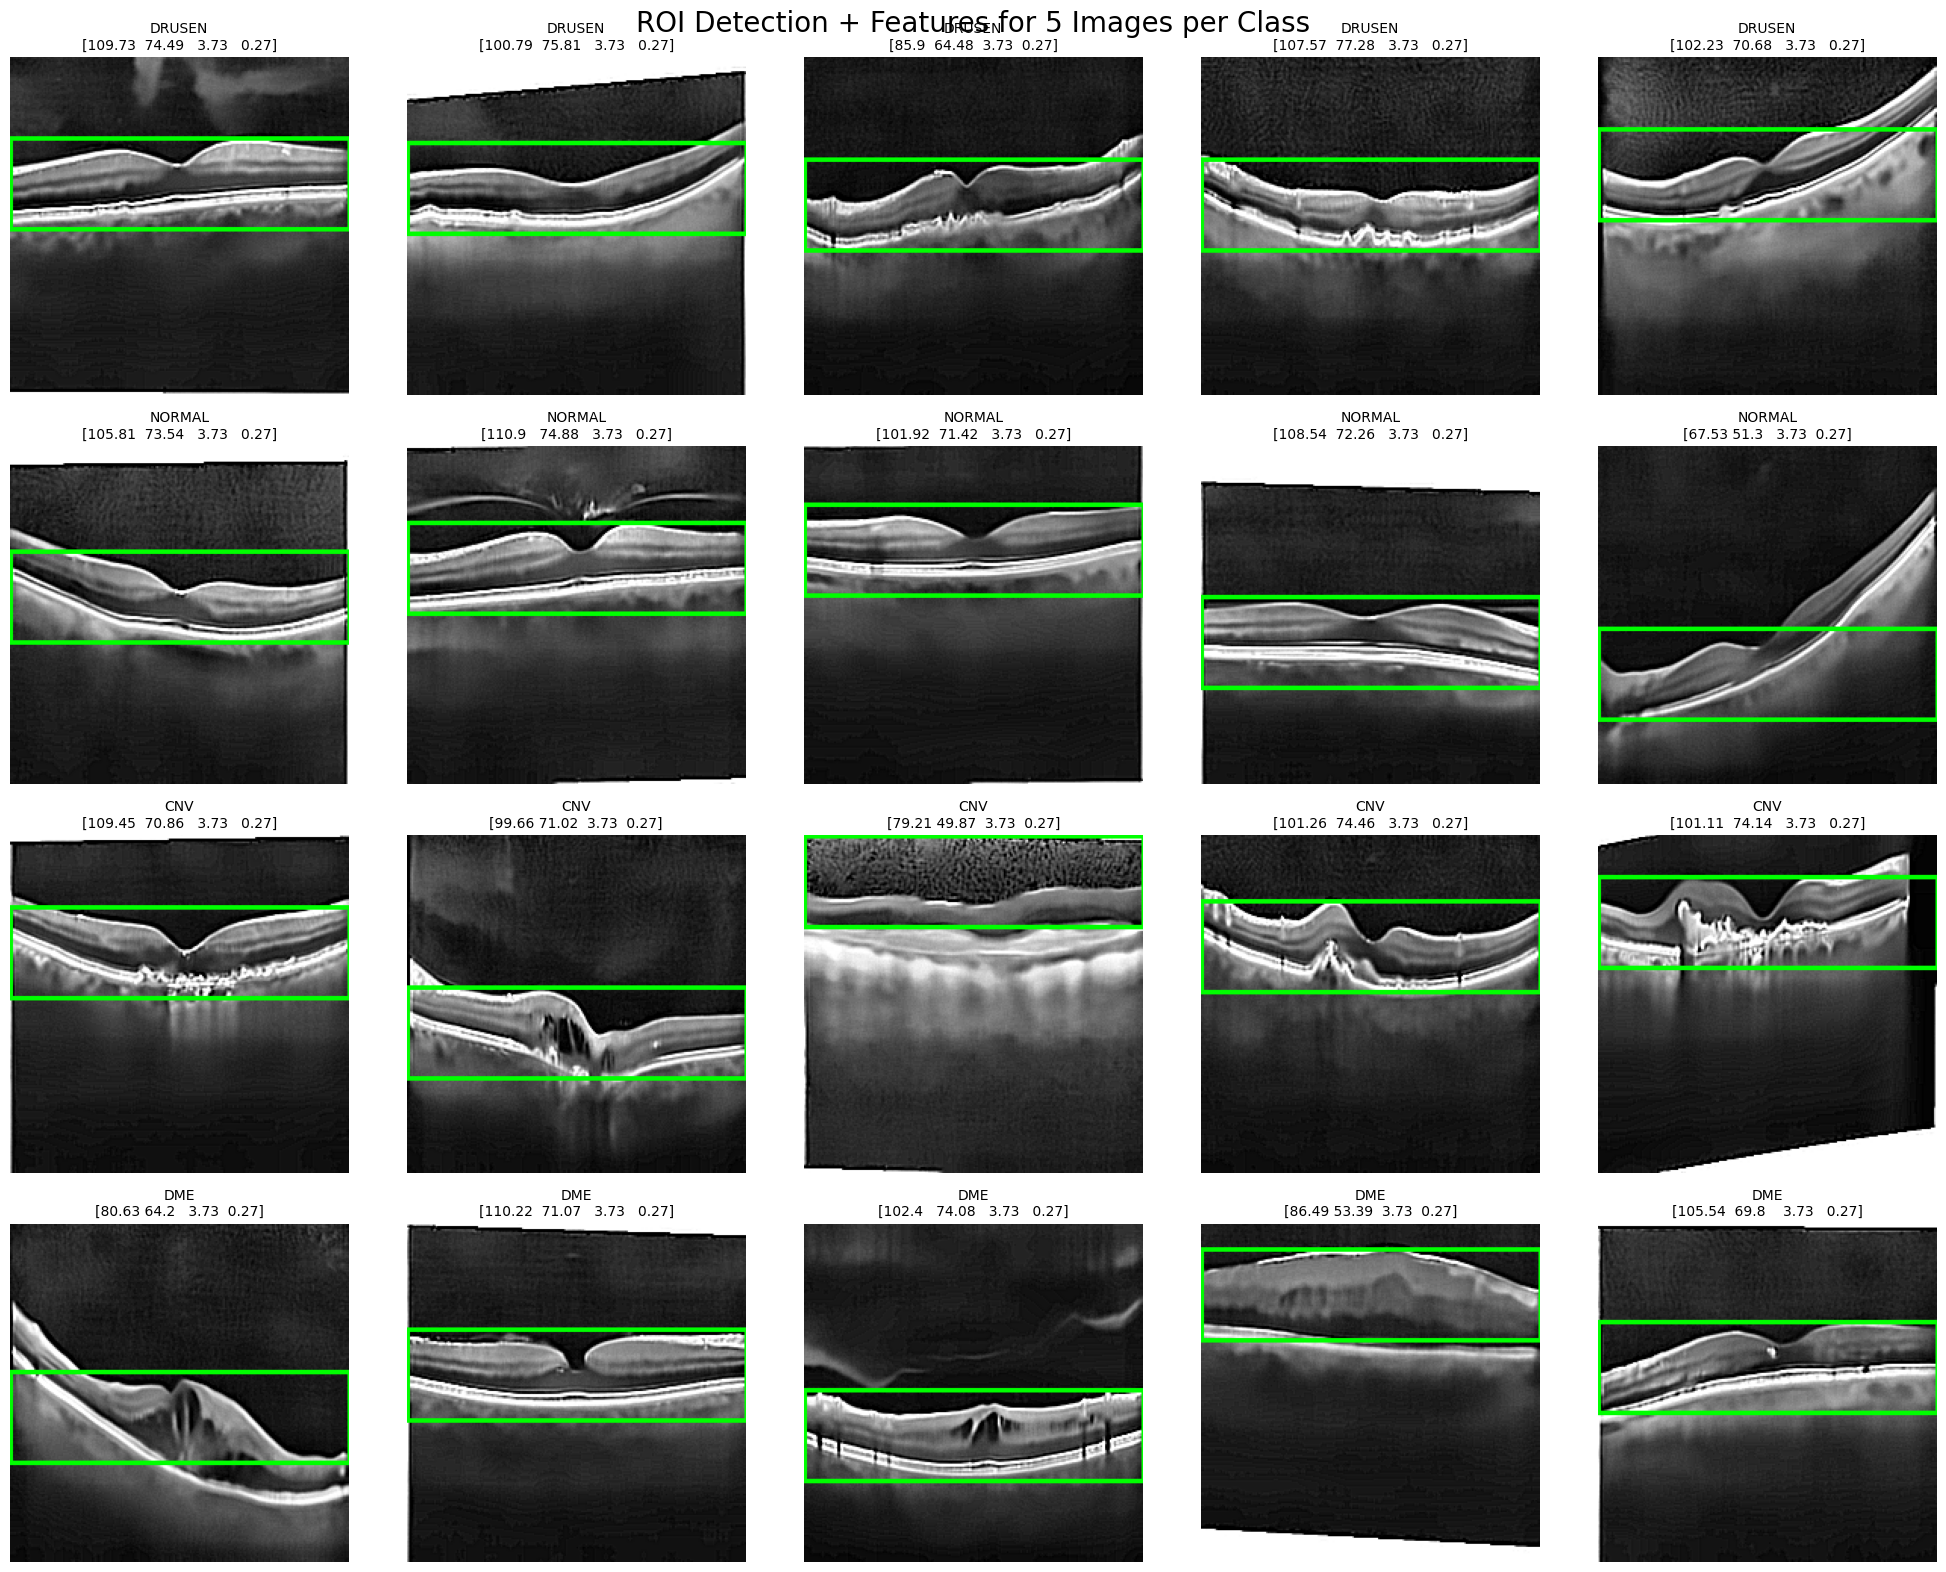

In [ ]:
balanced_dir = "/content/combined_dataset"
categories = [cat for cat in os.listdir(balanced_dir) if os.path.isdir(os.path.join(balanced_dir, cat))]

images_per_class = 5
plt.figure(figsize=(20, len(categories) * 4))

plot_index = 1

for category in categories:
    category_path = os.path.join(balanced_dir, category)
    image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if len(image_files) < images_per_class:
        continue

    selected_images = random.sample(image_files, images_per_class)

    for img_name in selected_images:
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue

        img_preprocessed = preprocess_image(img)
        roi_box = detect_roi_by_edge_density(img_preprocessed)
        features = extract_features(img_preprocessed, roi_box)

        img_color = cv2.cvtColor(img_preprocessed, cv2.COLOR_GRAY2BGR)
        x, y, w, h = roi_box
        cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 255, 0), 2)

        plt.subplot(len(categories), images_per_class, plot_index)
        plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
        plt.title(f"{category}\n{np.round(features, 2)}", fontsize=10)
        plt.axis('off')
        plot_index += 1

plt.suptitle("ROI Detection + Features for 5 Images per Class", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


# <b><font color='#B68D40'><h1>Full Image Processing and Saving</font></b>


In [ ]:
def preprocess_image(img):
    # Resize
    img = cv2.resize(img, (224, 224))

    # Denoise
    img = cv2.fastNlMeansDenoising(img, h=15)

    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(6, 6))
    img = clahe.apply(img)

    # Gaussian Blur
    img = cv2.GaussianBlur(img, (3, 3), 0)

    # Sharpening
    sharpen_kernel = np.array([[-1, -1, -1],
                               [-1,  9, -1],
                               [-1, -1, -1]])
    img = cv2.filter2D(img, -1, sharpen_kernel)

    return img

def detect_roi_by_edge_density(img_gray):
    # Edge detection using Sobel filters
    sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobelx**2 + sobely**2)

    # Sum of edge magnitudes row-wise
    row_sum = np.sum(magnitude, axis=1)

    window_height = 60
    max_density = 0
    best_top = 0

    for top in range(0, len(row_sum) - window_height):
        density = np.sum(row_sum[top:top + window_height])
        if density > max_density:
            max_density = density
            best_top = top

    roi_box = (0, best_top, img_gray.shape[1], window_height)
    return roi_box

def process_and_save_all_images(input_dir, output_dir):
    # Remove previous output directory if exists
    if os.path.exists(output_dir):
        shutil.rmtree(output_dir)
    os.makedirs(output_dir)

    for category in os.listdir(input_dir):
        class_path = os.path.join(input_dir, category)
        if not os.path.isdir(class_path):
            continue

        out_class_path = os.path.join(output_dir, category)
        os.makedirs(out_class_path, exist_ok=True)

        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        for img_name in tqdm(image_files, desc=f"🗂️ Processing {category}", unit="image"):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue

            # Step 1: Preprocessing
            img_processed = preprocess_image(img)

            # Step 2: ROI detection
            roi_box = detect_roi_by_edge_density(img_processed)
            x, y, w, h = roi_box

            # Step 3: Draw ROI box on image
            img_color = cv2.cvtColor(img_processed, cv2.COLOR_GRAY2BGR)
            cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Step 4: Save processed image
            save_path = os.path.join(out_class_path, img_name)
            cv2.imwrite(save_path, img_color)

    print(f"\n✅ Done! All images saved in: {output_dir}")

# ---------- Paths ---------- #
input_dataset = "/content/combined_balanced"
output_dataset = "/content/processed_dataset"

# ---------- Run Processing ---------- #
process_and_save_all_images(input_dataset, output_dataset)


🗂️ Processing DME: 100%|██████████| 8866/8866 [10:29<00:00, 14.08image/s]


✅ Done! All images saved in: /content/processed_dataset


In [ ]:
import os
import shutil
import random
from tqdm import tqdm

input_dir = "/content/processed_dataset"
output_dir = "/content/split_dataset"

train_ratio, val_ratio, test_ratio = 0.7, 0.15, 0.15

for split in ["train", "val", "test"]:
    for class_name in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_name)
        if os.path.isdir(class_path):
            os.makedirs(os.path.join(output_dir, split, class_name), exist_ok=True)

for class_name in tqdm(os.listdir(input_dir), desc="📁 Splitting"):
    class_path = os.path.join(input_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
    random.shuffle(images)

    total = len(images)
    train_end = int(total * train_ratio)
    val_end = train_end + int(total * val_ratio)

    splits = {
        "train": images[:train_end],
        "val": images[train_end:val_end],
        "test": images[val_end:]
    }

    for split_name, img_list in splits.items():
        for img in img_list:
            src = os.path.join(class_path, img)
            dst = os.path.join(output_dir, split_name, class_name, img)
            shutil.copyfile(src, dst)

print(f"✅ Done splitting data into folders at: {output_dir}")


📁 Splitting: 100%|██████████| 4/4 [00:04<00:00,  1.04s/it]

✅ Done splitting data into folders at: /content/split_dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil

# Adjust the path as needed
shutil.copytree('/content/split_dataset', '/content/drive/MyDrive/split_dataset')


'/content/drive/MyDrive/split_dataset'

# <b><font color='#B68D40'><h1>Imports and Dataset Paths</font></b>

In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

from tensorflow.keras import layers
from tensorflow.keras import Model, Sequential, models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19

In [2]:
train_dir = '/content/split_dataset/train'
val_dir   = '/content/split_dataset/val'
test_dir  = '/content/split_dataset/test'

In [ ]:
img_size = (224, 224)
batch_size = 32

# <b><font color='#B68D40'><h1>🔄  Data Generators (Normalization + Loading)Feature Extraction</font></b>


In [ ]:
train_gen = ImageDataGenerator( rescale= 1. / 255)
test_gen = ImageDataGenerator(rescale = 1. / 255)
val_gen = ImageDataGenerator(rescale = 1. / 255)

In [ ]:
train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size = 128,
    class_mode='sparse'
)
print(train_generator.class_indices)

Found 24824 images belonging to 4 classes.
{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}


In [ ]:
test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 128,
    class_mode = 'sparse'
)
print(test_generator.class_indices)

Found 5324 images belonging to 4 classes.
{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}


In [ ]:
val_generator = val_gen.flow_from_directory(
    val_dir,
    target_size = (224,224),
    batch_size = 128,
    class_mode = 'sparse'
)
print(val_generator.class_indices)

Found 5316 images belonging to 4 classes.
{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}


# <b><font color='#B68D40'><h1>Load and Freeze Base Model (VGG19)</font></b>
<font color='#D6AD60'>Loads VGG19 (a CNN pre-trained on ImageNet) without the top classification layers.

Used for feature extraction on OCT images.
Unfreezes only Block 5 layers (deepest part of VGG19).</font>

<font color='#D6AD60'>Allows fine-tuning of the most abstract features without disturbing lower-level filters.
</font>

In [3]:
# Load VGG19 with pre-trained weights
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers first
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze the last block (block5_conv1 to block5_conv4)
for layer in base_model.layers:
    print(layer.name)
    if 'block5' in layer.name:
        layer.trainable = True

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
input_layer
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [4]:
base_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 9,439,232 (36.01 MB)

 Non-trainable params: 10,585,152 (40.38 MB)

# <b><font color='#B68D40'><h1>Add Custom Classification Layers</font></b>
<font color='#D6AD60'>Applies global average pooling instead of flattening. Reduces overfitting and is more spatially aware.

Adds fully connected layers with Dropout for regularization.</font>

In [5]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Dropout

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

In [6]:
# Create the final model
model5 = Model(inputs=base_model.input, outputs=predictions)

In [7]:
model5.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,451,780 (78.02 MB)

 Trainable params: 9,866,628 (37.64 MB)

 Non-trainable params: 10,585,152 (40.38 MB)

# <b><font color='#B68D40'><h1>Model Compilation</font></b>


In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model5.compile(optimizer=Adam(learning_rate=1e-5),  # Low learning rate for fine-tuning
              loss='sparse_categorical_crossentropy',  # Or 'categorical_crossentropy' if using one-hot encoding
              metrics=['accuracy'])


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Get the class indices from the training generator
class_indices = train_generator.class_indices
class_labels = list(class_indices.keys())

# Obtain the labels for each image in the training data
train_labels = train_generator.classes

# Compute the class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights_dict = dict(enumerate(class_weights))

print("Class Labels:", class_labels)
print("Class Weights:", class_weights_dict)

Class Labels: ['CNV', 'DME', 'DRUSEN', 'NORMAL']
Class Weights: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0), 3: np.float64(1.0)}


In [ ]:
# 7. Callbacks for Checkpoints and Early Stopping
checkpoint_full_model = ModelCheckpoint(
    filepath='model_vgg19_update.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)
checkpoint_weights_only = ModelCheckpoint(
    filepath='model_vgg19_udate.weights.h5',
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

In [ ]:
# 8. Train the Model with Early Stopping and Checkpoints
history = model5.fit(
    train_generator,
    validation_data=val_generator,
    class_weight=class_weights_dict,
    epochs=128,
    callbacks=[checkpoint_full_model, checkpoint_weights_only, early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/128
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 913ms/step - accuracy: 0.3134 - loss: 1.5377
Epoch 1: val_loss improved from inf to 0.64696, saving model to model_vgg19_update.keras

Epoch 1: val_loss improved from inf to 0.64696, saving model to model_vgg19_udate.weights.h5
194/194 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.3140 - loss: 1.5364 - val_accuracy: 0.7483 - val_loss: 0.6470
Epoch 2/128
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 752ms/step - accuracy: 0.7382 - loss: 0.6958
Epoch 2: val_loss improved from 0.64696 to 0.44297, saving model to model_vgg19_update.keras

Epoch 2: val_loss improved from 0.64696 to 0.44297, saving model to model_vgg19_udate.weights.h5
194/194 ━━━━━━━━━━━━━━━━━━━━ 175s 899ms/step - accuracy: 0.7384 - loss: 0.6954 - val_accuracy: 0.8476 - val_loss: 0.4430
Epoch 3/128
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 753ms/step - accuracy: 0.8405 - loss: 0.4715
Epoch 3: val_loss improved from 0.44297 to 0.35991, saving model to model_vgg19_update.keras

Epoch 3: val_loss improved

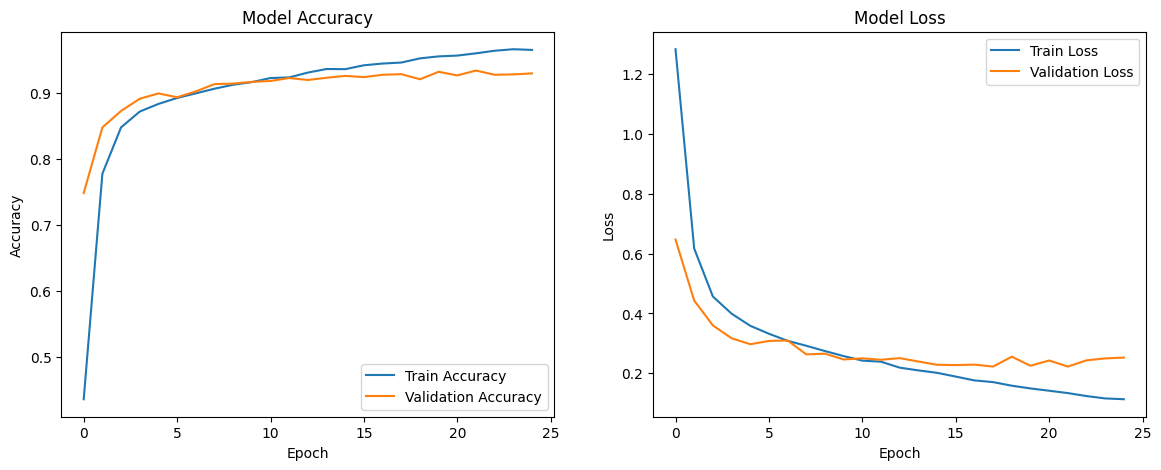

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_predicts = []
test_targets = []

# Iterate over the test generator to get predictions and true labels
for batch_index, (x_test, y_test) in enumerate(test_generator):
    if batch_index >= len(test_generator):
        break

    test_predict = model5.predict(x_test)
    batch_predicts = test_predict.argmax(axis=1)
    batch_targets = y_test


    # Append to overall lists
    test_predicts.append(batch_predicts)
    test_targets.append(batch_targets)

# Concatenate all predictions and true labels into numpy arrays
test_predicts = np.concatenate(test_predicts)
test_targets = np.concatenate(test_targets)

# Print overall classification report
print("Overall Classification Report:")
print(classification_report(test_targets, test_predicts))

4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 204ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━

Overall Confusion Matrix:
[[1244   29   54    4]
 [  32 1251   12   36]
 [  78   17 1160   76]
 [   1   42   38 1250]]


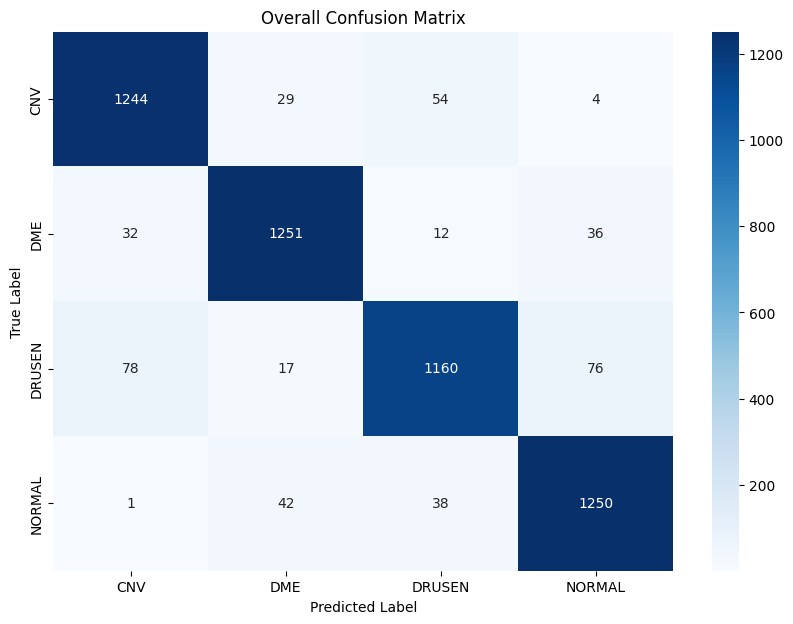

In [ ]:
# Print overall confusion matrix
overall_cm = confusion_matrix(test_targets, test_predicts)
print("Overall Confusion Matrix:")
print(overall_cm)
class_names = list(test_generator.class_indices.keys())
# Optionally, visualize the overall confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(overall_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names ,
            yticklabels=class_names )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Overall Confusion Matrix')
plt.show()

In [ ]:
train_loss, train_acc = model5.evaluate(train_generator, verbose=0)
print(f"Train Accuracy: {train_acc:.4f}")

val_loss, val_acc = model5.evaluate(val_generator, verbose=0)
print(f"Validation Accuracy: {val_acc:.4f}")

Train Accuracy: 0.9608
Validation Accuracy: 0.9283


In [ ]:
test_loss, test_acc = model5.evaluate(test_generator, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test Accuracy: 0.9213


In [ ]:
model5.save("VGG19_Model_Bounded_Box_More_Process.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


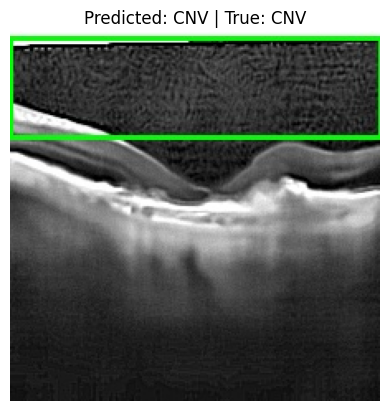

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


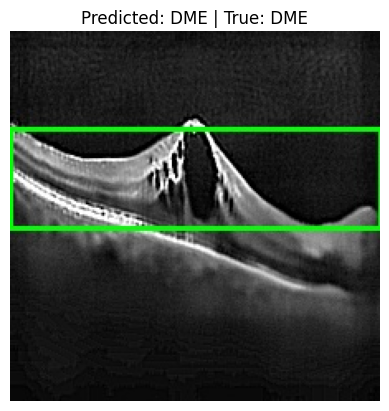

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


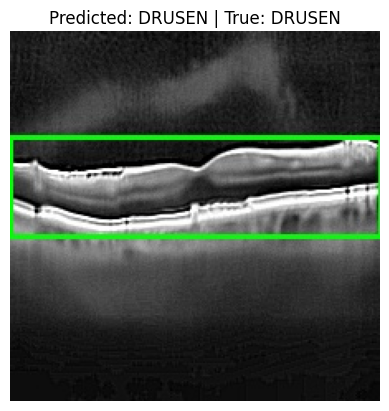

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


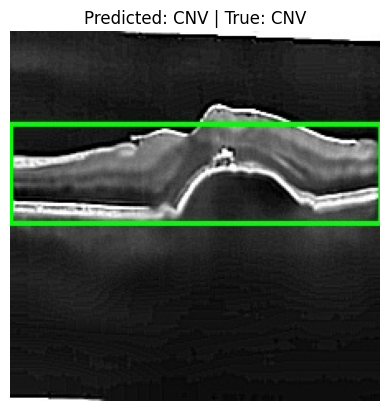

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


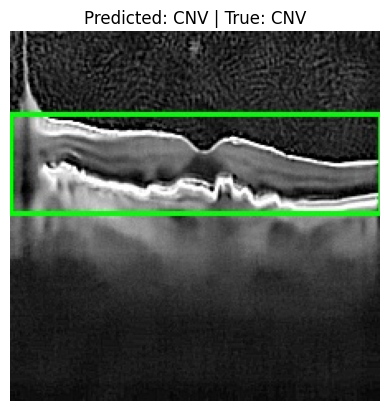

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to your test dataset folder
test_folder = '/content/split_dataset/test'

# Get class names from subdirectories
class_names = sorted(os.listdir(test_folder))

# Collect all image file paths
image_paths = []
for class_name in class_names:
    class_folder = os.path.join(test_folder, class_name)
    for img_file in os.listdir(class_folder):
        if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append((os.path.join(class_folder, img_file), class_name))

# Choose 5 random images
sample_images = random.sample(image_paths, 5)

# Predict and display
def predict_and_show(img_path, model, class_names, true_label):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model5.predict(img_array)[0]
    predicted_class = class_names[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} | True: {true_label}")
    plt.axis('off')
    plt.show()

# Run predictions on the 5 images
for img_path, true_label in sample_images:
    predict_and_show(img_path, model5, class_names, true_label)
